In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.2


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [4]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_images)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

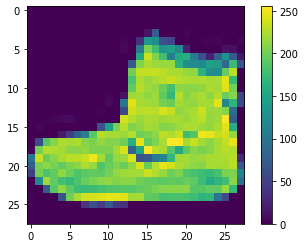

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
# plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

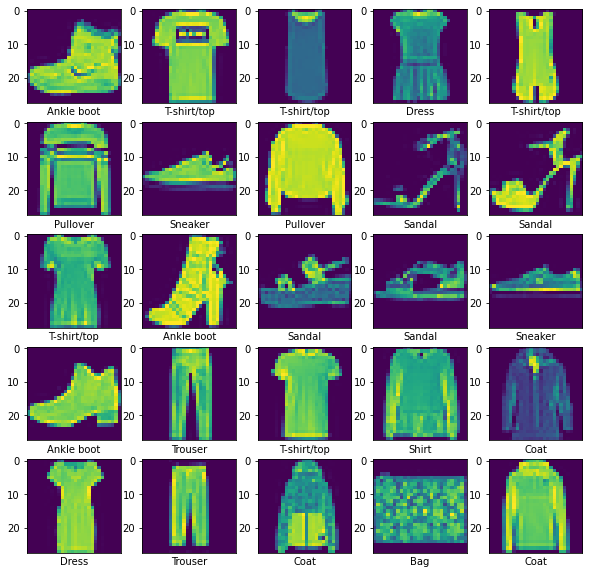

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

2022-02-23 16:54:58.201128: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.compile(optimizer='Adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs = 10)

2022-02-23 16:54:58.793895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5069 - accuracy: 0.8209
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2688 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - loss: 0.3254 - accuracy: 0.8897


In [16]:
print('\n Test Accuracy:', test_acc)


 Test Accuracy: 0.8896999955177307
